# Weekly activity
 # Q1

In [1]:
import sys
assert sys. version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
img = cv.imread("images/boat.jpg")
show_img("boat" , img)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [6]:
# Convert the image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
th2 = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

In [8]:
# Find contours in the binary image
contours, _ = cv.findContours(th2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the regions with boat and people
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the segmented image with bounding boxes
cv.imshow('Segmented Image', img)
cv.waitKey(0)
cv.destroyAllWindows()


# Q2

In [9]:
img = cv.imread("images/leaf.jfif", 0)
show_img("leaf", img)

In [10]:
th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

In [13]:
def nothing(x):
    pass

wn = 'window'
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while True:
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
    
    # define the kernel
    kernel = np.ones((size, size), dtype=np.uint8)
    # erosion
    erosion = cv.erode(th2, kernel, iterations=iteration)
    
    cv.imshow(wn, erosion)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

# Q3

In [15]:
blue_low = (90, 50, 50)
blue_high = (130, 255, 255)

white_low = (0, 0, 200)
white_high = (180, 30, 255)

def color_seg(img, color_low, color_high, color_low2, color_high2, smooth=True):
    """Arguments:
    img: source image (RGB)
    color_low: hsv low
    color_high: hsv high
    smooth: boolean (Gaussian blurring)"""
    img_ori = img.copy()
    if smooth: 
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    mask2 = cv.inRange(img_hsv, color_low2, color_high2)
    
    segmented_mask = cv.bitwise_or(mask, mask2)
    res = cv.bitwise_and(img_ori, img_ori, mask=segmented_mask)
    return res

imgs = []

for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high, white_low, white_high) for img in imgs]

# Display the segmented images
for i in range(5):
    cv.imshow(f"Segmented Image {i+1}", res[i])

cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
import matplotlib.pyplot as plt


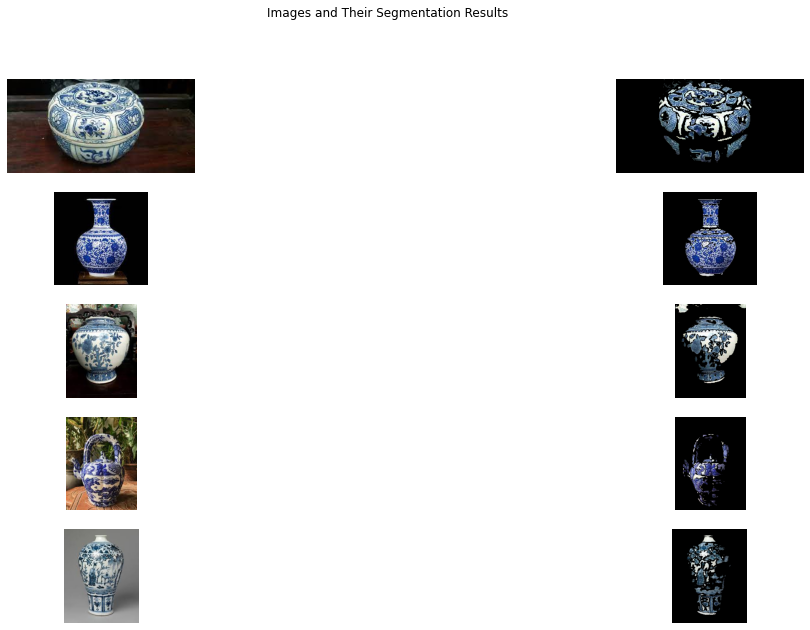

In [20]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("Images and Their Segmentation Results")
plt.show()